# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# READING THE DATASETS

In [2]:
training = pd.read_csv("Data_file.csv")

In [3]:
testing = pd.read_csv("Test_data_file.csv")

In [4]:
training.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [5]:
testing.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1.0,0.0,1.0,0.0,55523.0,3.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0.0,1.0,0.0,1.0,57081.0,1.0,84.0,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0.0,1.0,0.0,1.0,60347.0,2.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0.0,0.0,0.0,1.0,49010.0,2.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0.0,0.0,0.0,1.0,57879.0,4.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removing the index as Python has an in-built indexing method

In [6]:
del training["S.No."]

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   object
 4   Previous job changes  1338 non-null   int64 
 5   Graduation marks      1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   CTC                   1338 non-null   object
dtypes: int64(3), object(5)
memory usage: 83.8+ KB


In [8]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   College_T1            1338 non-null   float64
 4   College_T2            1338 non-null   float64
 5   Role_Manager          1338 non-null   float64
 6   City_Metro            1338 non-null   float64
 7   previous CTC          1338 non-null   float64
 8   previous job changes  1338 non-null   float64
 9   Graduation marks      1338 non-null   float64
 10  Exp                   1338 non-null   float64
 11  Actual CTC            1338 non-null   float64
 12  Predicted CTC         0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15          

In [9]:
training.describe()

,Previous job changes,Graduation marks,Exp (Months)
count,1338.000000,1338.000000,1338.000000
mean,2.525411,59.890882,39.207025
std,1.123502,14.894696,14.049960
min,1.000000,35.000000,18.000000
25%,2.000000,47.000000,27.000000
50%,3.000000,60.000000,39.000000
75%,4.000000,73.000000,51.000000
max,4.000000,85.000000,64.000000


In [10]:
testing.describe()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,0.0,...,0.0,1.00000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.00000,1.000000
mean,0.485052,0.272048,0.204783,0.505232,55581.762332,2.525411,59.890882,39.207025,75459.338993,NaN,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
std,0.499963,0.445181,0.403694,0.500160,6685.600553,1.123502,14.894696,14.049960,12551.280262,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.319030,NaN,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
25%,0.000000,0.000000,0.000000,0.000000,50547.000000,2.000000,47.000000,27.000000,66905.070033,NaN,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
50%,0.000000,0.000000,0.000000,1.000000,55293.500000,3.000000,60.000000,39.000000,73112.640485,NaN,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
75%,1.000000,1.000000,0.000000,1.000000,60150.500000,4.000000,73.000000,51.000000,80747.178420,NaN,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639
max,1.000000,1.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.994300,NaN,...,NaN,32438.76192,4659.731658,-832.274662,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639


Analysing the data types of the data

In [11]:
training['CTC'] = training['CTC'].str.replace(',', '').astype(float)
training['Previous CTC']= training['Previous CTC'].str.replace(',', '').astype(float)

In [12]:
training.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10


In [13]:
training['Previous CTC'] = pd.to_numeric(training['Previous CTC'])
training['CTC'] = pd.to_numeric(training['CTC'])

In [14]:
training.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


# PLOTTING GRAPHS FOR TRAINING DATASET
The heatmap depicts values for a main variable of interest across two axis variables as a grid of colored squares

<AxesSubplot:>

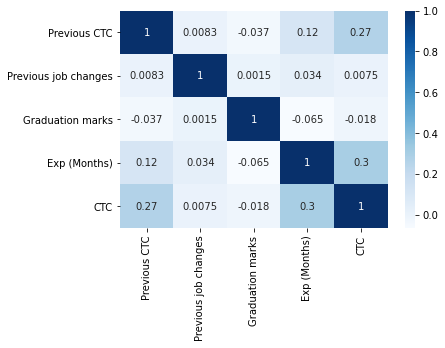

In [15]:
sns.heatmap(training.corr(),cmap="Blues",linecolor="white",annot=True)

CONVERTING CATEGORICAL VALUES TO NUMERICAL VALUES (using get_dummies)

In [16]:
training =pd.get_dummies(training, drop_first=True)

In [17]:
testing = pd.get_dummies(testing, drop_first=True)
testing.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,1.0,0.0,1.0,0.0,55523.0,3.0,66.0,19.0,71406.57653,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1
1,0.0,1.0,0.0,1.0,57081.0,1.0,84.0,18.0,68005.87063,NaN,...,19359.9439,4080.577268,0.451593,-29.041071,-3.65235,258.940639,1,0,0,0
2,0.0,1.0,0.0,1.0,60347.0,2.0,52.0,28.0,76764.02028,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
3,0.0,0.0,0.0,1.0,49010.0,2.0,81.0,33.0,82092.38688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
4,0.0,0.0,0.0,1.0,57879.0,4.0,74.0,32.0,73878.09773,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0


In [18]:
training.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523.0,3,66,19,71406.58,0,0,1,1
1,57081.0,1,84,18,68005.87,1,0,0,0
2,60347.0,2,52,28,76764.02,1,0,0,0
3,49010.0,2,81,33,82092.39,0,1,0,0
4,57879.0,4,74,32,73878.10,0,1,0,0


# TRAINING THE LINEAR REGRESSION MODEL

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [20]:
x = training.drop("CTC",axis=1)
y = training["CTC"]

In [21]:
regressor.fit(x,y)

LinearRegression()

In [22]:
y_pred= regressor.predict(x)

In [73]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

,Actual,Predicted
0,71406.58,86123.937724
1,68005.87,65789.546863
2,76764.02,69941.690699
3,82092.39,66843.038412
4,73878.10,70556.761579
...,...,...
1333,69712.40,76044.346272
1334,69298.75,65742.551429
1335,66397.77,64046.074943
1336,64044.38,66223.222142


# MEAN SQUARED VALUE

In [23]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))

Mean Squared Error: 61677935.43609013


# PREDICTED VALUES

In [24]:
predicted = pd.concat([testing, pd.DataFrame(y_pred, columns=["Predicted CTC"])], axis=1)

In [25]:
predicted = predicted[["College_Tier 2", "College_Tier 3", "City type_Non-Metro", "Graduation marks", "Role_Manager", "Actual CTC", "Predicted CTC"]]

In [26]:
predicted.head(5)

,College_Tier 2,College_Tier 3,City type_Non-Metro,Graduation marks,Role_Manager,Role_Manager,Actual CTC,Predicted CTC,Predicted CTC
0,0,0,1,66.0,1.0,1,71406.57653,NaN,86123.937724
1,1,0,0,84.0,0.0,0,68005.87063,NaN,65789.546863
2,1,0,0,52.0,0.0,0,76764.02028,NaN,69941.690699
3,0,1,0,81.0,0.0,0,82092.38688,NaN,66843.038412
4,0,1,0,74.0,0.0,0,73878.09773,NaN,70556.761579
